This notebook contains the code and instructions to run Deep Potential Molecular Dynamics simualtions (DPMD) with the trained models of butane using all the datasets and classical (CLC) and Ab initio single point calculation (SPC).

The main idea of this runs is to analyze the dihedral samples of butane during the unbias DPMD simulation and compare it with the reference distribution of dihedrals. The main simulation script is 'Butane_Unbias_DPMD.in'. THis file contains importat simulation settings such as the temperature, timestep, siumulation time, and force field to be used. Inside this file you will find a commented par_coeff options that can be uncommented to use any of the trained forcefield for the simulations. 

For porposes of this tutorial we will keep working with the butane model Trained with the Boltzmann distribution and the ab initio level of theory, but the same approach will work for any of the other models. Change name of the title of the plot accordingly. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Load dihedrals from unbias DPMD and reference simulation 

dihed_dpmd = np.loadtxt('dihedral.dat')
dihed_ref = np.loadtxt('./../prep_train_CLC/prep_train_data/dihedral.dat')

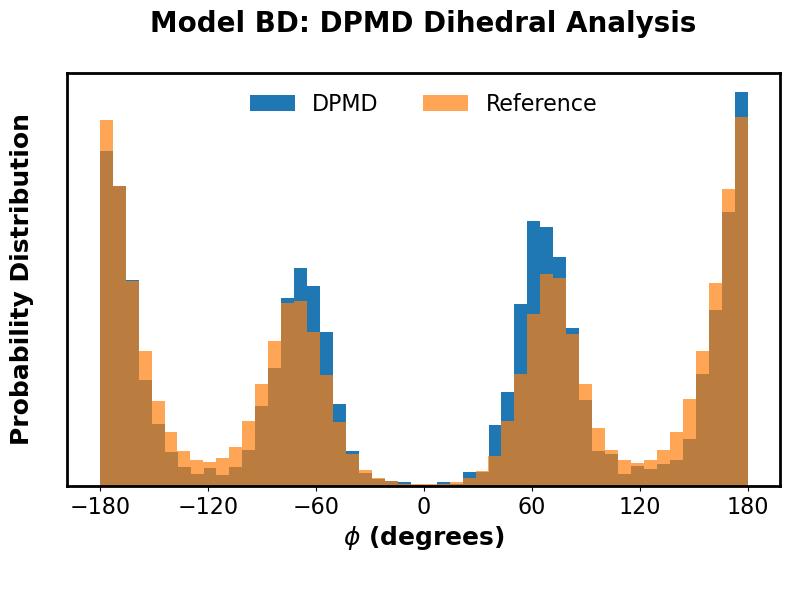

In [9]:
# Plot a histogram of the sampled dihedrals to compare them

plt.figure(figsize=(8,6))
# Creating a histogram
plt.hist(np.rad2deg(dihed_dpmd[:,1]), bins=50,density=True,label='DPMD')  # You can adjust the number of bins as desired
plt.hist(np.rad2deg(dihed_ref[:,1]), bins=50,density=True,label='Reference',alpha =0.7)  # You can adjust the number of bins as desired
# Adding labels and title to the plot
plt.title('Model BD: DPMD Dihedral Analysis\n',fontsize=20, fontweight='bold')
plt.xlabel('$\phi$ (degrees)\n',fontsize=18, fontweight='bold')
plt.ylabel('Probability Distribution\n',fontsize=18, fontweight='bold')

# Increase size of tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Make the xaxis go from -180 to 180  in 60 degree steps
plt.xticks(np.arange(-180, 180+60, step=60))

#plt.yticks(np.arange(0, 0.016+0.004, step=0.004))

# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# DO not show the y axis ticks
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.legend(fontsize=16,frameon=False,ncol=3,loc='upper center')
plt.tight_layout()
# Save the figure
#plt.savefig('ModA_DPDM_dihed_analysis.png',dpi=400,bbox_inches='tight')
plt.show()
